In [1]:
# Import required packages
import sys
# !{sys.executable} -m pip install seaborn
from glob import glob
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from shutil import copy,move
from distutils.dir_util import copy_tree


In [5]:
len(glob("*/*results.json"))

98

In [2]:
stackeddf=[]
for i in glob("*/*results.json"):
    name = os.path.dirname(i)
    with open(i) as f:
        data = json.load(f)
    data['encoder']=name.split('_')[0]
    data['ansatz']=name.split('_')[1]
    stackeddf.append(pd.DataFrame.from_dict(data).rename(index={0:name}))

stackeddf = pd.concat(stackeddf).melt(id_vars=['encoder','ansatz'], value_vars=['MAE_train','MAE_test'])

In [3]:
stackeddf.sort_values(by='value')

,encoder,ansatz,variable,value
71,M-M-CZ,HWE-CNOT,MAE_train,18.984733
169,M-M-CZ,HWE-CNOT,MAE_test,18.999803
1,M-A1-CZ,Full-Pauli-CRZ,MAE_train,19.205337
42,M,HWE-CNOT,MAE_train,19.292819
56,M-A1-CZ,HWE-CZ,MAE_train,19.300597
...,...,...,...,...
176,A2-A2-CZ,Modified-Pauli-CRZ,MAE_test,34.380281
73,M-M-CZ,Modified-Pauli-CRZ,MAE_train,34.809756
171,M-M-CZ,Modified-Pauli-CRZ,MAE_test,36.240502
190,A2-A2-CNOT,HWE-CZ,MAE_test,41.379631


/var/folders/px/qyhp9b8j4bb0z5wgydzgkpxw0000gn/T/ipykernel_7400/3297483802.py:1: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  g = sns.catplot(


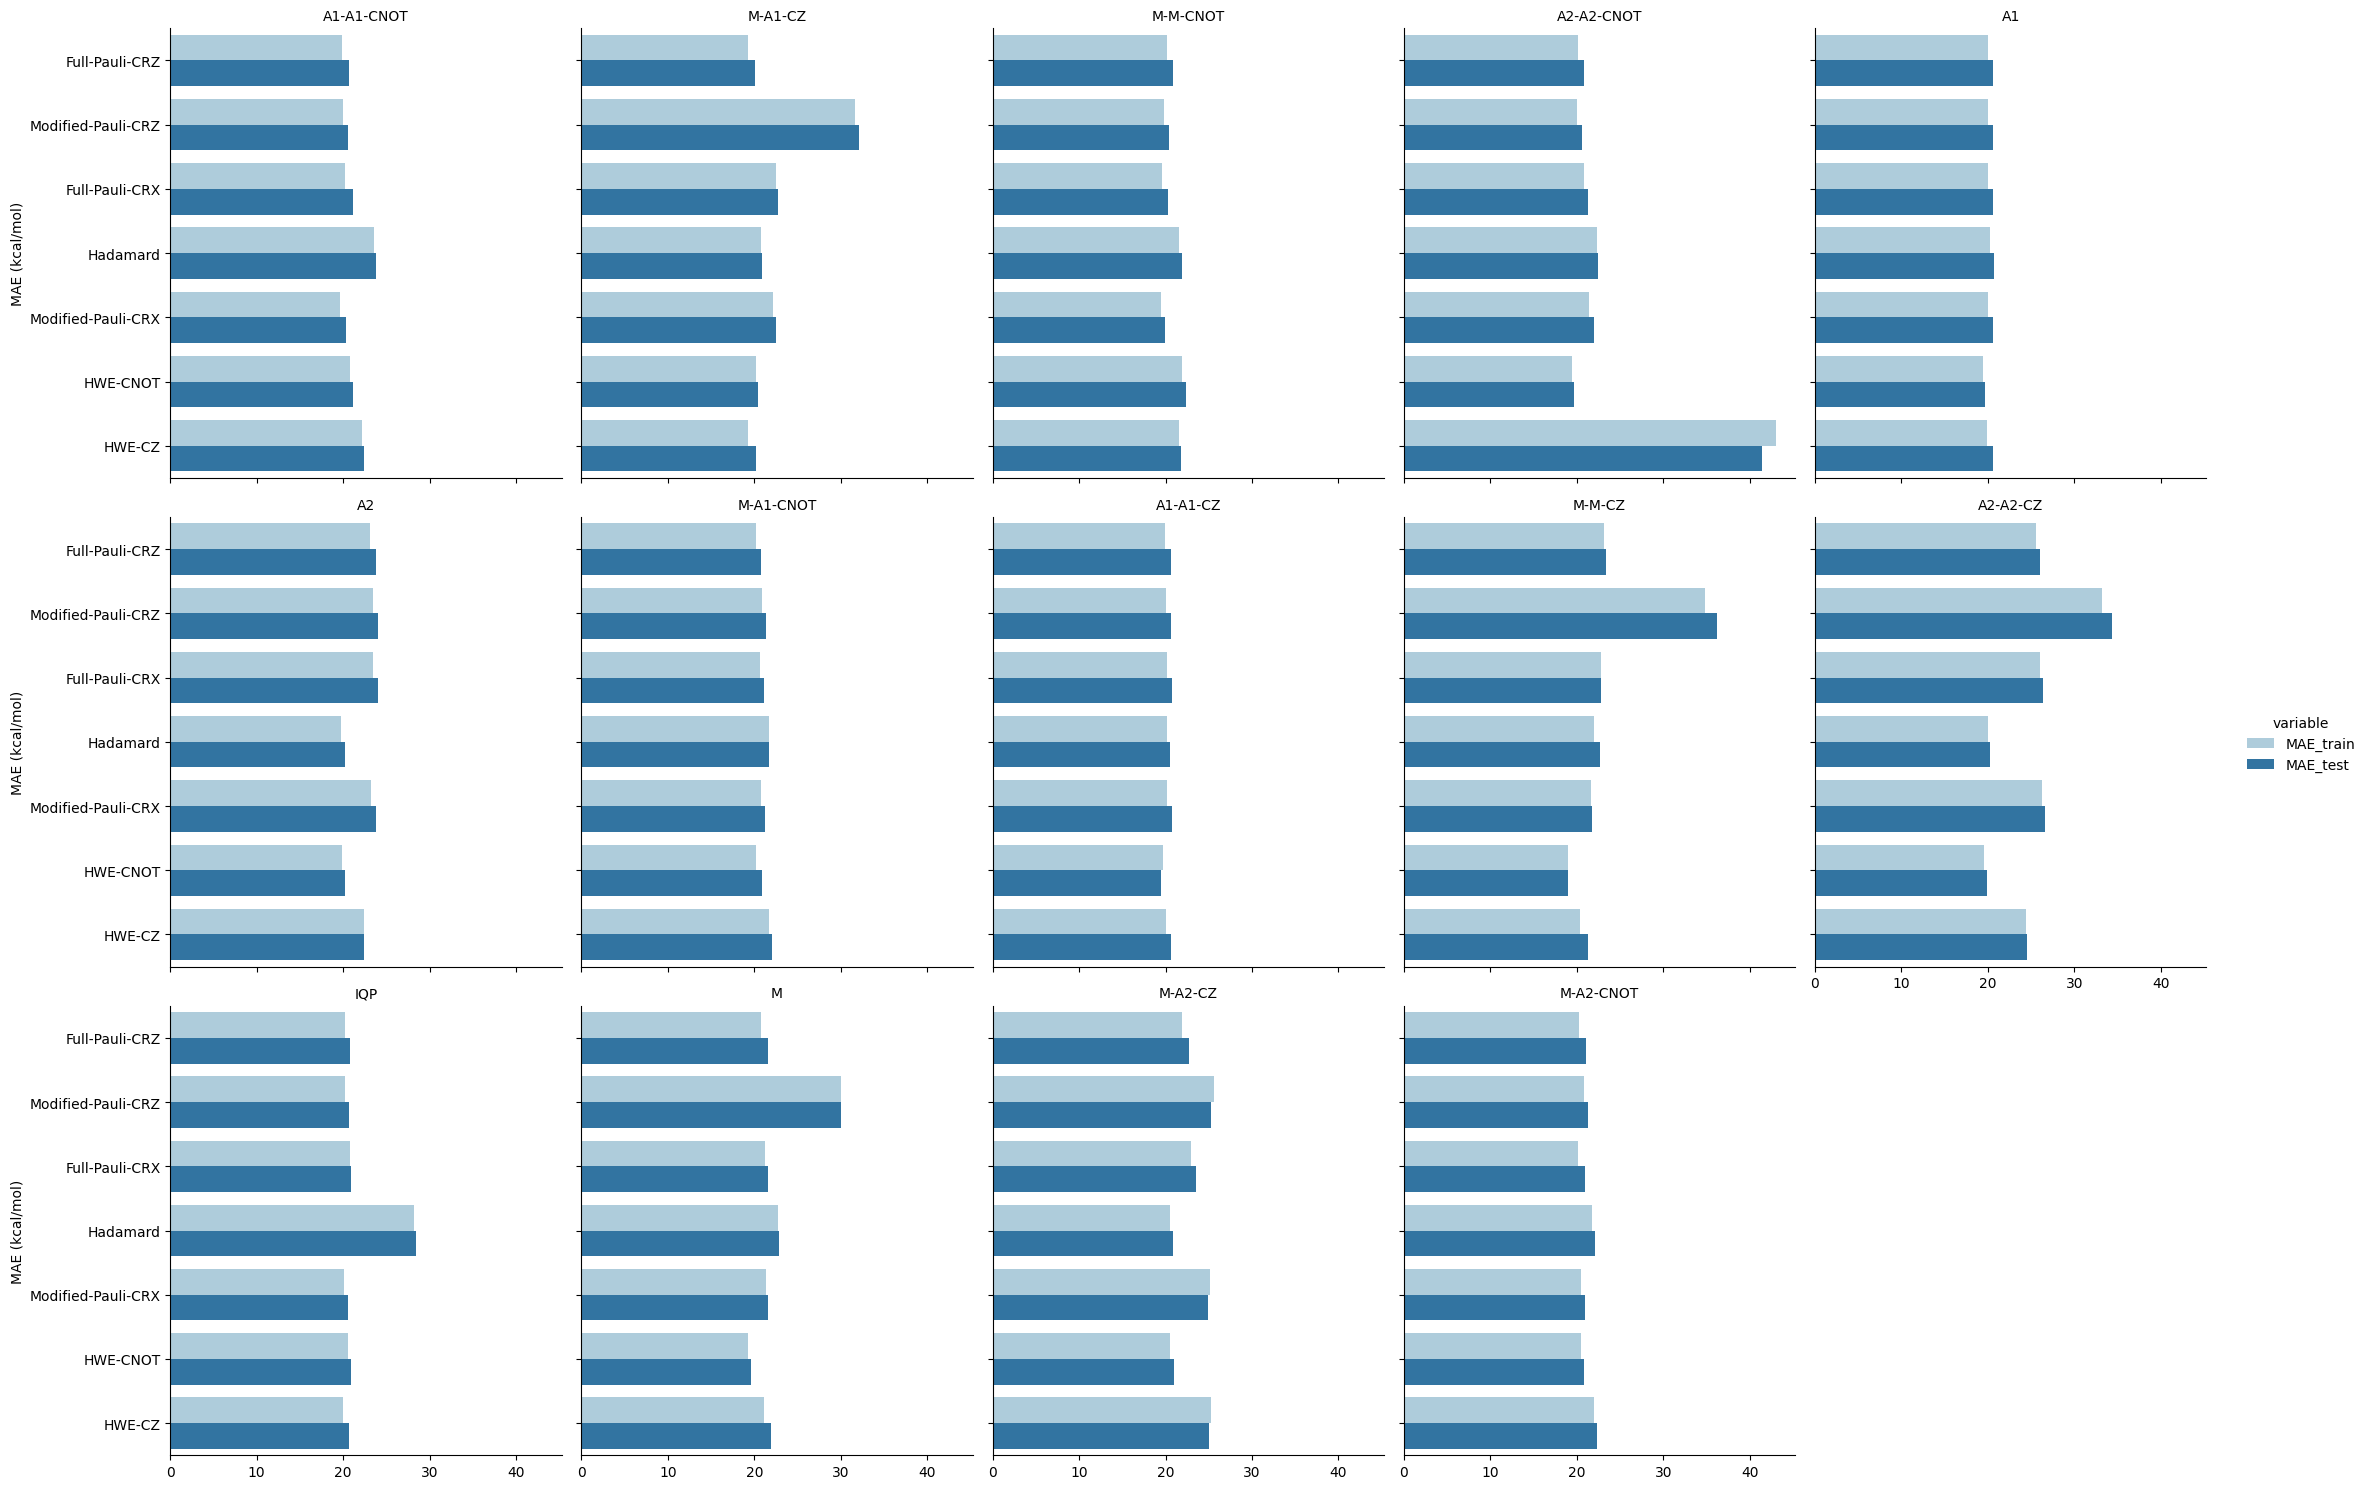

In [4]:
g = sns.catplot(
    data=stackeddf, y="ansatz", x="value", col="encoder",hue="variable",
    kind="bar", height=5, aspect=.9,palette=sns.color_palette('Paired',5),col_wrap=5,legend_out=True)

g.set_titles("{col_name}")
# g.set_axis_labels("", "R$^{2}$")
g.set_axis_labels("", "MAE (kcal/mol)")
# g.set(ylim=(-1.1, 1.1))
# g.fig.suptitle(f"16 Qubit BSE Re-upload Depth (RUD) and Ansatz Layer (AL)")
g.tight_layout()